### Evaluación Final – Caso HESPE ANN
#### Contexto del Problema
Usted ha sido contratado como parte de un equipo de análisis del rendimiento de estudiantes en 
la facultad de ingeniería y de ciencias de la universidad de Wisconsin, para participar en el 
proyecto HESPE (Higher Education Student Performance Evaluation). Deberá, por lo tanto, poner a 
prueba todas las habilidades y conocimientos adquiridos a lo largo de este curso. 
En este nuevo desafío, su objetivo es incorporar a su investigación modelos de redes neuronales
para elaborar un modelo de aprendizaje de máquina que permita realizar predicciones sobre el 
resultado académico. Tome como base el trabajo realizado durante los últimos módulos.
Algunos lineamientos:
*  Utilice distintas arquitecturas (capas ocultas, nodos)
* Utilice distintas combinaciones de funciones de activación y dropout
* Utilice distintos optimizadores e hiperparámetros de entrenamiento
* Presente el modelo definitivo que considerará y explique las decisiones que tomó para elegirlo


### Respuesta

* Como se ha analizado antes, el problema HESPE ya se ha caracterizado por su exploración de datos. Por lo que ahora se enfocara directamente en los modelos.

In [71]:
#Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
df = pd.read_csv('hespe-data.csv',sep=';')

In [73]:
df.head()

,student_id,age,sex,graduated_h_school_type,scholarship_type,additional_work,activity,partner,total_salary,transport,...,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id,grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


### Planteamiento del modelo

In [74]:
X = df.drop(["student_id",'grade'],axis=1)

y=df[['grade']]

In [75]:
X.head()

,age,sex,graduated_h_school_type,scholarship_type,additional_work,activity,partner,total_salary,transport,accomodation,...,attendances_classes,preparation_midterm_company,preparation_midterm_time,taking_notes,listenning,discussion_improves_interest,flip_classrom,grade_previous,grade_expected,course_id
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,3,1,4,...,1,2,1,2,2,2,1,2,2,1


In [76]:
y

,grade
0,1
1,1
2,1
3,1
4,1
...,...
140,5
141,5
142,1
143,4


# Usando ANN

### Preprocesamiento

#### Escalamiento

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
X_enc = scaler.fit_transform(X)

In [79]:
X_enc[:2]

array([[ 0.62076591,  0.81649658,  1.97095572, -0.71287324, -1.39970842,
         0.81649658,  0.8521681 , -0.61726487, -0.58697039, -0.93567462,
        -1.05244435, -0.55482123,  0.14241298, -0.35249748, -0.44694921,
         1.65508309,  0.87502947,  0.09842846, -0.02563681, -0.52146891,
        -0.35306336, -0.56407607, -0.55150254, -0.40660449,  0.80849333,
        -0.08205236, -2.31314559,  0.23908058, -1.63825152, -1.88766626,
        -0.96372631],
       [ 0.62076591,  0.81649658,  1.97095572, -0.71287324, -1.39970842,
         0.81649658,  0.8521681 , -0.61726487, -0.58697039, -0.93567462,
        -0.23199042,  0.31962527, -0.59508281, -0.35249748, -0.44694921,
        -1.36362192, -0.21875737,  0.09842846, -0.02563681, -0.52146891,
        -0.35306336, -0.56407607, -0.55150254, -0.40660449,  0.80849333,
        -0.08205236,  1.00770699,  0.23908058, -0.86699675,  0.3020266 ,
        -0.96372631]])

### One hot Y

In [80]:
from sklearn.preprocessing import OneHotEncoder

In [81]:
enc = OneHotEncoder()

In [82]:
y_enc = enc.fit_transform(y.values.reshape(-1,1)).toarray()

In [83]:
y_enc.shape

(145, 8)

### Validacion Cruzada

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.2, random_state=21)



In [86]:
X_train.shape

(116, 31)

In [87]:
X_test.shape

(29, 31)

In [88]:
X_enc.shape

(145, 31)

### Arquitectura de la red neuronal

En este caso, utilizaremos capas densas (fully connected)

*  Probar con activation: relu, tanh, linear
*  Probar optimizadores: Adam, SGD, RMSProp, Adagrad
*  Probar combinaciones de capas


-  Input vector (31 nodos) activación ‘tanh’
-  Hidden Layer 1 (62 nodos) activación ‘tanh’
-  Hidden Layer 2 (62 nodos) activación ‘tanh’
-  Hidden Layer 3 (80 nodos) activación ‘softmax’
- learning rate de 0.02

In [89]:
import tensorflow
from tensorflow import keras

In [90]:
from tensorflow.keras import Sequential,Input
from tensorflow.keras.layers import Dense, Dropout

In [162]:
model = Sequential()
model.add( Input(shape=(31,)) )
model.add( Dense(120, activation='tanh') )
model.add(Dropout(0.2))
model.add( Dense(120, activation='tanh') )
model.add(Dropout(0.2))
model.add( Dense(120, activation='tanh') )
model.add(Dropout(0.2))
model.add( Dense(120, activation='tanh') )
model.add(Dropout(0.2))
model.add( Dense(8, activation='softmax') )

In [163]:
opt = keras.optimizers.Adam(learning_rate=0.02)
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

### Visualización del modelo

In [164]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 120)               3840      
                                                                 
 dropout_16 (Dropout)        (None, 120)               0         
                                                                 
 dense_27 (Dense)            (None, 120)               14520     
                                                                 
 dropout_17 (Dropout)        (None, 120)               0         
                                                                 
 dense_28 (Dense)            (None, 120)               14520     
                                                                 
 dropout_18 (Dropout)        (None, 120)               0         
                                                                 
 dense_29 (Dense)            (None, 120)              

In [165]:
from tensorflow.keras.utils import plot_model

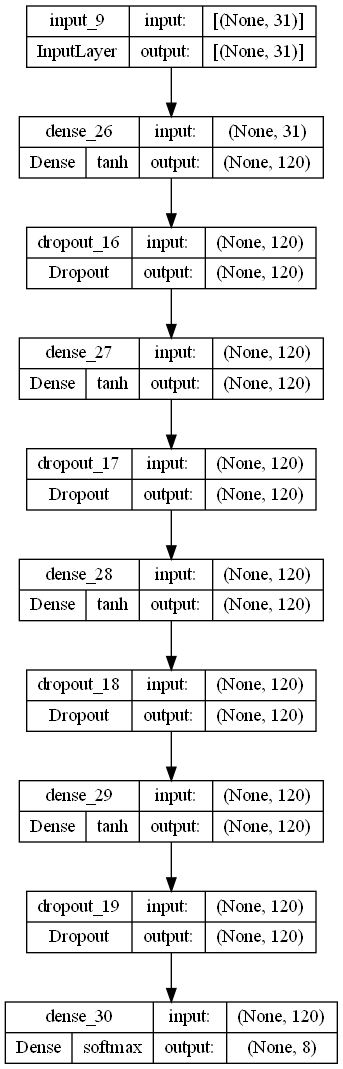

In [166]:
plot_model(model, show_shapes=True, show_layer_activations=True)

### Entrenamiento

In [167]:
history = model.fit(X_train, y_train,
                    batch_size=128, epochs=50,
                    validation_data=(X_test,y_test) )

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 2.3711 - accuracy: 0.0690 - val_loss: 2.3337 - val_accuracy: 0.3448
Epoch 2/50
1/1 [==============================] - 0s 62ms/step - loss: 1.6218 - accuracy: 0.4310 - val_loss: 2.7059 - val_accuracy: 0.3103
Epoch 3/50
1/1 [==============================] - 0s 58ms/step - loss: 1.4116 - accuracy: 0.4483 - val_loss: 3.2853 - val_accuracy: 0.2414
Epoch 4/50
1/1 [==============================] - 0s 50ms/step - loss: 1.3712 - accuracy: 0.5345 - val_loss: 2.9543 - val_accuracy: 0.3448
Epoch 5/50
1/1 [==============================] - 0s 53ms/step - loss: 1.0419 - accuracy: 0.6121 - val_loss: 2.9399 - val_accuracy: 0.3793
Epoch 6/50
1/1 [==============================] - 0s 50ms/step - loss: 0.9563 - accuracy: 0.6638 - val_loss: 3.2955 - val_accuracy: 0.2414
Epoch 7/50
1/1 [==============================] - 0s 50ms/step - loss: 0.8039 - accuracy: 0.7155 - val_loss: 3.6880 - val_accuracy: 0.2069
Epoch 8/50
1/1 [=============

## Evaluación

In [185]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [169]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 80ms/step


In [170]:


X_test1 = np.argmax(X_test, axis=1)


In [171]:
X_test1

array([22, 23,  8,  8, 19,  3, 16, 27, 23, 11,  3, 17, 20,  0,  8, 15,  7,
        0, 22,  7, 19,  8, 11,  7,  8, 19, 14, 22,  2], dtype=int64)

In [172]:
y_pred[:5]

array([[1.8437224e-04, 6.1424637e-01, 7.8617745e-08, 6.9360406e-04,
        3.8136697e-01, 2.6092713e-03, 2.1069629e-06, 8.9717185e-04],
       [6.4856827e-02, 3.9157467e-03, 9.2515510e-01, 3.2074337e-03,
        6.4039558e-11, 2.4973149e-03, 3.2241203e-04, 4.5165059e-05],
       [5.9250468e-01, 4.1839159e-03, 2.7022657e-01, 1.2107832e-02,
        2.4512406e-07, 2.5196890e-05, 1.9183541e-07, 1.2095143e-01],
       [5.6908017e-01, 4.0647390e-01, 1.5972359e-05, 2.2745177e-02,
        6.5460599e-06, 1.6671381e-03, 1.7601776e-07, 1.0922045e-05],
       [1.7738876e-04, 4.9040416e-05, 8.6334685e-06, 9.9931371e-01,
        3.5539853e-09, 4.4827384e-04, 3.0209580e-07, 2.6569949e-06]],
      dtype=float32)

In [173]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.]])

In [174]:
y_test[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]])

In [175]:
y_pred_clase = np.argmax(y_pred, axis=1)
y_test_clase = np.argmax(y_test, axis=1)

In [176]:
y_pred_clase

array([1, 2, 0, 0, 3, 3, 0, 7, 5, 6, 2, 7, 0, 1, 0, 1, 2, 2, 3, 1, 2, 2,
       7, 2, 0, 7, 5, 7, 5], dtype=int64)

In [177]:
y_test_clase

array([2, 4, 1, 2, 1, 2, 3, 7, 6, 7, 4, 1, 1, 1, 1, 1, 2, 2, 7, 1, 2, 1,
       6, 0, 1, 7, 7, 0, 1], dtype=int64)

In [178]:
accuracy_score(y_pred_clase, y_test_clase)

0.27586206896551724

In [179]:
y_pred_real = model.predict(X)

5/5 [==============================] - 0s 3ms/step


In [181]:
y_pred_real=np.argmax(y_pred_real, axis=1)

In [183]:
accuracy_score(y, y_pred_real)

0.23448275862068965

## Evolución del entrenamiento

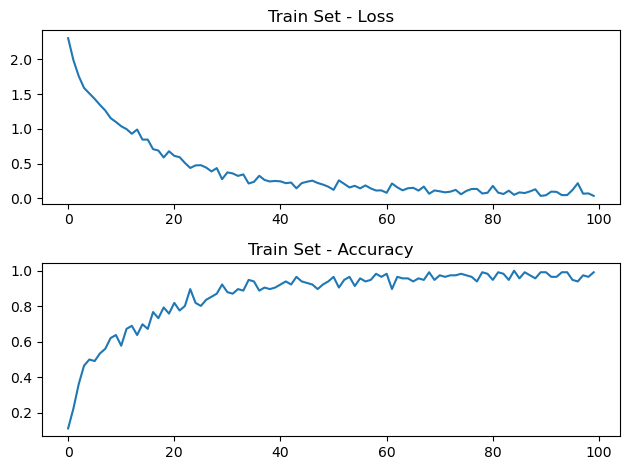

In [125]:
plt.subplot(2,1,1)
plt.title('Train Set - Loss')
plt.plot(history.history['loss'])
plt.subplot(2,1,2)
plt.title('Train Set - Accuracy')
plt.plot(history.history['accuracy'])
plt.tight_layout()